
Title: SGD Regressor for Property Prediction
=======
- Created: 2019.10.03
- Updated: 2019.11.06
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents


## SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

> class sklearn.linear_model.SGDRegressor(loss=’squared_loss’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate=’invscaling’, eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)[source]

HyperParameters
---



-   **loss**:  : str, default: ‘squared_loss’
  - The loss function to be used. The possible values are *‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’*
    - *‘squared_loss’* refers to the ordinary least squares fit(DEFAULT)
    -  *‘huber’* modifies ‘squared_loss’ to focus less on getting outliers correct by switching from squared to linear loss past a distance of epsilon.
    -  *‘epsilon_insensitive’* ignores errors less than epsilon and is linear past that; this is the loss function used in SVR.
    - *‘squared_epsilon_insensitive’* is the same but becomes squared loss past a tolerance of epsilon.  
  
  
- **penalty**:  str, ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
  - The penalty (aka regularization term) to be used. 
    - *l2*(DEFAULT): standard regularizer for linear SVM models. => <U>Lidge Regression</U>
    $$ min(||Y-\widehat{Y}||^2_2 + \lambda||\theta||^2_2$$
      - $\lambda$: ridge function의 alpha값, alpha값이 클 수록 penalty도 커지면서 계수의 크기가 줄어든다. 이는 변수를 축소하면서 다중공선선(multicollinearity)를 방지하는데 쓰임
      - 모든 변수를 가지고 오면서 계수값을 줄인다. 하지만 model이 아직까지도 복잡한 상태이고 변수도 유지하므로 모델 성능 저하에 영향을 미칠 수 있다.
      
    - *l1*: Regularization with l1 norm, 중요한 몇 개의 변수만 선택하고 다른 계수들은 0으로 줄인다. 이 특징은 Feature selection으로 알려져 있고 ridge regression은 이 과정이 없다 => <U>Lasso Regression</U>
      - 변수를 자동채택 할 수 있어 일반적으로 많은 변수를 다룰 때 활용
    $$ min(||Y-\widehat{Y}||^2_2 + \lambda||\theta||^2_1$$
      - 변수들 끼리 상관관계가 존재한다면 Lasso는 단 한개의 변수만 채택하므로 정보의 손실을 야기하여 정확성이 떨어질 수 있다.
      
    - *elasticnet*: Ridge & Lasso regression의 조합=> <U>Elastic Net</U>
      $$ min(||Y-\widehat{Y}||^2_2 + \lambda_1||\theta||^2_1+ \lambda_2||\theta||^2_2$$
      - 상관 관계가 존재하는 변수로 구성된 그룹을 형성한다. 이 그룹의 변수 중 하나가 강력한 예측변수가 있다면 이 그룹을 model building에 포함시킨다. 상관관계를 최대한 유지하면서 필요없는 변수의 영향을 최대한 지우는 것
      
      $ Alpha = \lambda_1 + \lambda_2 $    and       l1_ratio$  = \frac{\lambda_1 }{\lambda_1 + \lambda_2} $
      
      
- **alpha**[float]: Constant that multiplies the regularization term. Defaults to 0.0001 Also used to compute learning_rate when set to ‘optimal’.  &nbsp;

- **1l_ratio**[float]: The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Defaults to 0.15.  

- **fit_intercept**[bool]: Whether the intercept should be estimated or not. If False, the data is assumed to be already centered. Defaults to True.  

- **max_iter**[int, optional](defalut=1000): The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit.  

- **tol**[ float or None, optional (default=1e-3)]: The stopping criterion. If it is not None, the iterations will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.  

- **shuffle**[bool, optional]: Whether or not the training data should be shuffled after each epoch. Defaults to True.  

- **epsilon**[float]: Epsilon in the epsilon-insensitive loss functions; only if loss is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
  - For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. For epsilon-insensitive, any differences between the current prediction and the correct label are ignored if they are less than this threshold.  
  
- **random_state**[int, RandomState instance or None, optional (default=None)]: The seed of the pseudo random number generator to use when shuffling the data.
  -  If None, the random number generator is the RandomState instance used by np.random.  

- **learning_rate**[string, optional]: learning rate schedule
  - *constant*: eta = eta0
  - *optimal*: $ eta = \frac{1.0}{alpha * ( t + t0)}$, t0 is chose by  a heuristic proposed by Leon Bottou
  - *invscaling*[default]: $eta = \frac{eta0}{pow(t, 'power_t')}
  - *adaptive*: eta = eta0, as long as the training keeps decreasing.
    -  Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.  
    
- **eta0**[double]: The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.  

- **power_t**[double]: The exponent for inverse scaling learning rate [default 0.5].  

- **early_stopping**[bool, default=False]: Whether to use early stopping to terminate training when validation score is not improving.
  - If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.  

- **validation_fraction**[float, default=0.1]: The proportion of training data to set aside as validation set for early stopping.
  - Must be between 0 and 1. Only used if early_stopping is True.  
  
- **n_iter_no_change**[int, default=5]: Number of iterations with no improvement to wait before early stopping.  

- **warm_start**[bool, optional]: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
  - Repeatedly calling fit or partial_fit when warm_start is True can result in a different solution than when calling fit a single time because of the way the data is shuffled. If a dynamic learning rate is used, the learning rate is adapted depending on the number of samples already seen. Calling fit resets this counter, while partial_fit will result in increasing the existing counter.  
  
- **average**[bool or int, optional]: When set to True, computes the averaged SGD weights and stores the result in the coef_ attribute.
  -  If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples.  

Attributes
---

- **coef_** [array, shape (n_features,)]:  Weights assigned to the features.

- **intercept_**[array, shape (1,)]: The intercept term.

- **average_coef_**[array, shape (n_features,)]: Averaged weights assigned to the features.

- **average_intercept_ **[array, shape (1,)]: The averaged intercept term.

- **n_iter_**[int]: The actual number of iterations to reach the stopping criterion.


Regularization
---



- regression의 결과 중 상관계수가 높은 것들에 집중하는 penalty를 주는 방법
- 

Setup
---

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Pandas
import pandas as pd

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
"""
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
"""

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Get the data
============

In [0]:

from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data (1).csv
User uploaded file"3MA_data.csv" with length30235 bytes


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [2]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),5k_RE,5k_IM,5k_time,5k_voltage
0,193.928416,0.000000,2.247535,7.353994,-0.617027,412.0,8.103753,0.048710,0.0,5.330770
1,193.928416,7.832161,2.249186,7.330924,-0.934697,412.0,8.084683,0.057399,3.2,5.329357
2,193.928416,7.825444,2.248753,7.367316,-0.574723,412.0,8.099559,0.125401,6.4,5.331381
3,193.928416,7.813692,2.249833,7.345533,-0.862965,412.0,8.103011,0.153286,9.6,5.329095
4,193.928416,7.780144,2.247326,7.350974,-0.681030,412.0,8.122078,0.185302,12.8,5.333564


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.5 KB


2 Variable (1k_RE & 1k_IM) data
---

In [4]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.4 KB


In [5]:
df.describe()

,yield stress,elongation,1k_RE,1k_IM
count,190.000000,190.000000,190.000000,190.000000
mean,331.194462,5.071727,7.184671,-0.994367
std,60.202631,1.598025,0.078204,0.122292
min,193.928416,0.000000,7.076378,-1.220670
25%,294.251701,3.747314,7.121649,-1.065305
50%,346.269052,5.080847,7.162842,-1.015719
75%,380.555745,6.401437,7.245272,-0.922856
max,406.890446,7.832161,7.367316,-0.574723


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001643C35EF60>,
      dtype=object)

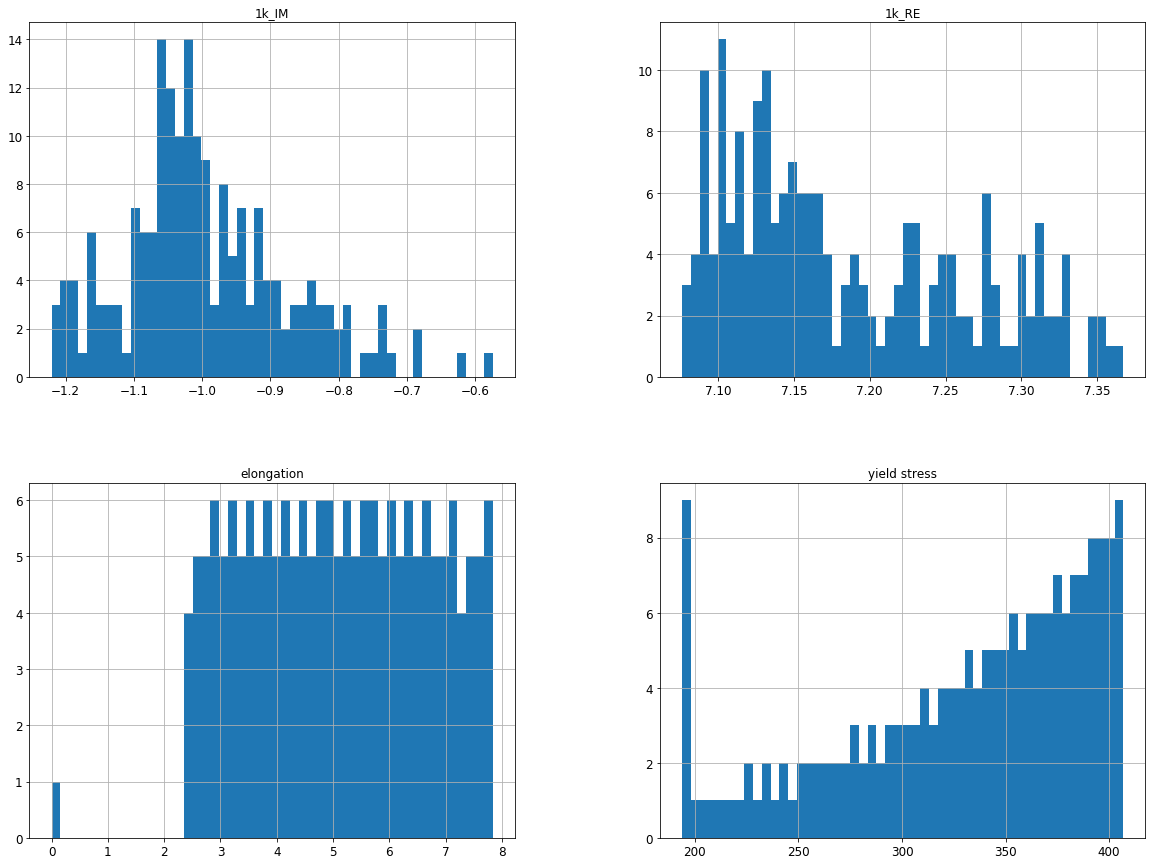

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [0]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [0]:
len(X_test)

39

## 6 Variables (1k_RE, 1k_IM, 1k_voltage, 5k_RE, 5k_IM, 5k_voltage) data

In [32]:
df = pd.read_csv("3MA_data.csv")
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 10 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
UTS(no)         190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C35FE24CC0>,
      dtype=object)

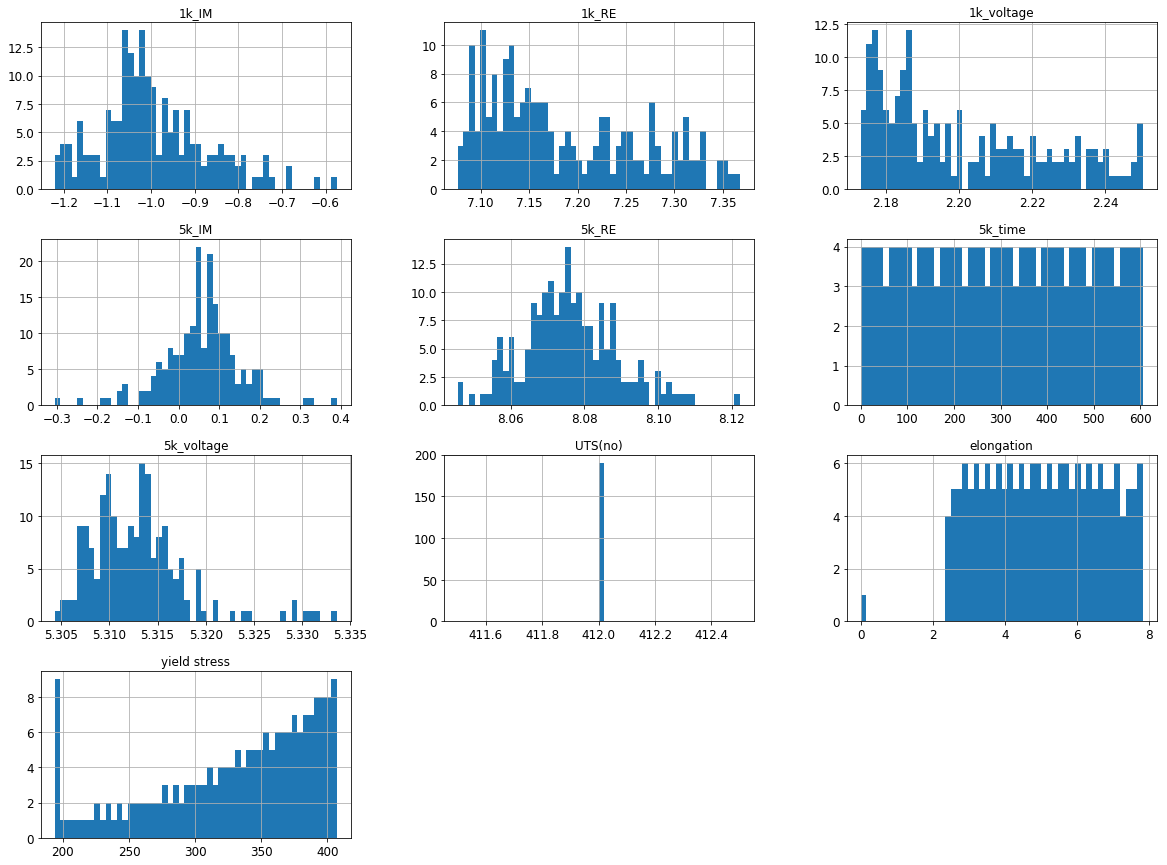

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [34]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [38]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM", "1k_voltage", "5k_RE", "5k_IM", "5k_voltage"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [39]:
len(X_test)

38

In [37]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [75]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.4 KB


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 51 to 102
Data columns (total 6 columns):
1k_RE         152 non-null float64
1k_IM         152 non-null float64
1k_voltage    152 non-null float64
5k_RE         152 non-null float64
5k_IM         152 non-null float64
5k_voltage    152 non-null float64
dtypes: float64(6)
memory usage: 8.3 KB


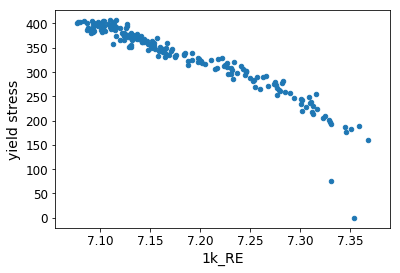

In [0]:
df_copy.plot(kind="scatter", x="1k_RE", y="yield stress")

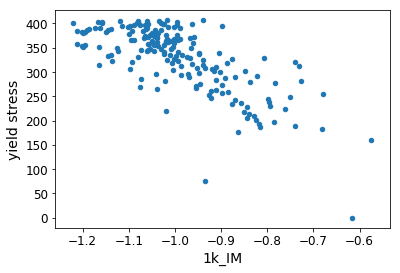

In [0]:
df_copy.plot(kind="scatter", x="1k_IM", y="yield stress")

In [0]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_RE,1k_IM
yield stress,1.000000,-0.776652,-0.947305,-0.726706
elongation,-0.776652,1.000000,0.883247,0.591942
1k_RE,-0.947305,0.883247,1.000000,0.816920
1k_IM,-0.726706,0.591942,0.816920,1.000000


In [0]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)

# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
1k_IM          -0.726706
elongation     -0.776652
1k_RE          -0.947305
Name: yield stress, dtype: float64

In [0]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_RE           0.883247
1k_IM           0.591942
yield stress   -0.776652
Name: elongation, dtype: float64

## PCA & ICA Feature Extraction

In [5]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df = df.drop(df.index[190:209])
df.head()

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),5k_RE,5k_IM,5k_time,5k_voltage
0,193.928416,0.000000,2.247535,7.353994,-0.617027,412.0,8.103753,0.048710,0.0,5.330770
1,193.928416,7.832161,2.249186,7.330924,-0.934697,412.0,8.084683,0.057399,3.2,5.329357
2,193.928416,7.825444,2.248753,7.367316,-0.574723,412.0,8.099559,0.125401,6.4,5.331381
3,193.928416,7.813692,2.249833,7.345533,-0.862965,412.0,8.103011,0.153286,9.6,5.329095
4,193.928416,7.780144,2.247326,7.350974,-0.681030,412.0,8.122078,0.185302,12.8,5.333564


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 10 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
UTS(no)         190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.3 KB


In [12]:
df = df.loc[:,["1k_RE","yield stress"]]#, "yield stress", "elongation"]]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 2 columns):
1k_RE           190 non-null float64
yield stress    190 non-null float64
dtypes: float64(2)
memory usage: 4.5 KB


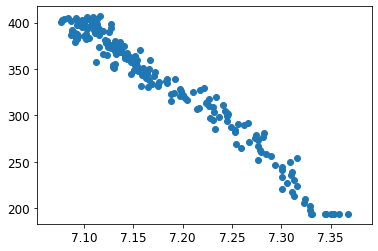

In [9]:
x = df.loc[:,["1k_RE"]]
y = df.loc[:,["yield stress"]]

plt.scatter(x,y)

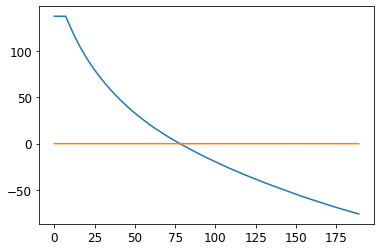

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
S_pca_ = pca.fit(df).transform(df)

S_pca_
#plt.scatter(x,y)
plt.plot(S_pca_)
plt.show()

In [21]:
S_pca_

array([[ 1.37266150e+02,  5.50642606e-03],
       [ 1.37266121e+02,  2.85756754e-02],
       [ 1.37266167e+02, -7.81650013e-03],
       [ 1.37266140e+02,  1.39674512e-02],
       [ 1.37266147e+02,  8.52613461e-03],
       [ 1.37266138e+02,  1.49744254e-02],
       [ 1.37266156e+02,  1.22172854e-03],
       [ 1.37266120e+02,  2.90546210e-02],
       [ 1.33190492e+02,  2.49935582e-02],
       [ 1.29128710e+02,  2.04128283e-02],
       [ 1.25203093e+02,  2.13456715e-02],
       [ 1.21400083e+02,  1.51207061e-02],
       [ 1.17689579e+02,  2.17808860e-02],
       [ 1.14129330e+02,  1.86697517e-02],
       [ 1.10600163e+02,  2.44097337e-02],
       [ 1.07299083e+02,  5.11659493e-03],
       [ 1.04060582e+02,  1.17394907e-02],
       [ 1.00975958e+02,  6.95269110e-04],
       [ 9.79581152e+01,  9.16451058e-03],
       [ 9.50498714e+01, -4.10925722e-03],
       [ 9.21812959e+01, -8.63388919e-03],
       [ 8.94614109e+01, -2.53027459e-03],
       [ 8.68263258e+01, -5.84083610e-03],
       [ 8.

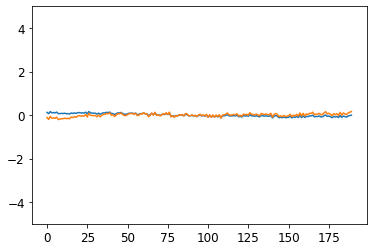

In [20]:
from sklearn.decomposition import FastICA

ica = FastICA()
S_ica_ = ica.fit(df).transform(df)

S_ica_
#plt.scatter(x,y)
plt.plot(S_ica_)
plt.ylim(-5,5)
plt.show()

In [22]:
S_ica_

array([[ 0.12465819, -0.11245105],
       [ 0.06501892, -0.20384373],
       [ 0.159101  , -0.05967006],
       [ 0.10278451, -0.14597081],
       [ 0.11685156, -0.12441413],
       [ 0.10018125, -0.14996011],
       [ 0.13573511, -0.09547651],
       [ 0.06378073, -0.20574115],
       [ 0.07015555, -0.18696144],
       [ 0.07788784, -0.16613213],
       [ 0.07150407, -0.16723568],
       [ 0.08374892, -0.14006332],
       [ 0.06277635, -0.1639987 ],
       [ 0.06721688, -0.1493226 ],
       [ 0.04880672, -0.1697322 ],
       [ 0.09534364, -0.09111951],
       [ 0.07494506, -0.11521885],
       [ 0.10037568, -0.06942855],
       [ 0.07542715, -0.10098819],
       [ 0.10680013, -0.04648163],
       [ 0.11559475, -0.02666244],
       [ 0.09706338, -0.04904699],
       [ 0.10295561, -0.03419171],
       [ 0.09062949, -0.04738169],
       [ 0.13354407,  0.02389069],
       [ 0.05724072, -0.087574  ],
       [ 0.16373039,  0.08087903],
       [ 0.10015868, -0.01145507],
       [ 0.09367426,

In [75]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [78]:
component = pd.DataFrame(pca.components_)

component.to_csv("component.csv", mode ='w')

In [26]:
print("ica shape: ",S_ica_.shape)
print("pca shape: ",S_pca_.shape)

ica shape:  (190, 6)
pca shape:  (190, 6)


In [27]:
S_pca_

array([[ 4.13343458e-01,  3.42362030e-02, -4.36755487e-02,
         1.95685619e-02, -8.29013795e-03, -1.95543048e-03],
       [ 1.31306621e-01,  3.32139463e-03,  1.01152609e-01,
        -1.77782340e-04, -1.20153050e-02,  1.32363806e-03],
       [ 4.60541940e-01, -3.92864363e-02, -5.79754925e-02,
         1.42919078e-02, -8.86714345e-03, -4.86974812e-04],
       ...,
       [-1.00061144e-01, -1.33069607e-02, -3.84008921e-02,
         1.67999696e-02,  1.09781773e-03,  1.86047274e-03],
       [ 2.12633829e-02, -2.58169690e-01, -1.07641950e-01,
         5.96649085e-03, -2.77767539e-03,  4.54493721e-04],
       [-5.74014759e-02, -2.10771152e-02, -5.18398375e-02,
        -1.90972018e-03, -2.51447884e-03,  5.38466955e-03]])

In [72]:
S_ica_ = pd.DataFrame(S_ica_)
#S_ica_.to_csv("ICA_data_in.csv", mode ='w')

S_pca_ = pd.DataFrame(S_pca_)
#S_pca_.to_csv("PCA_data_in.csv", mode ='w')

In [73]:
S_pca_.components_

AttributeError: 'DataFrame' object has no attribute 'components_'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A64D2B9B0>,
      dtype=object)

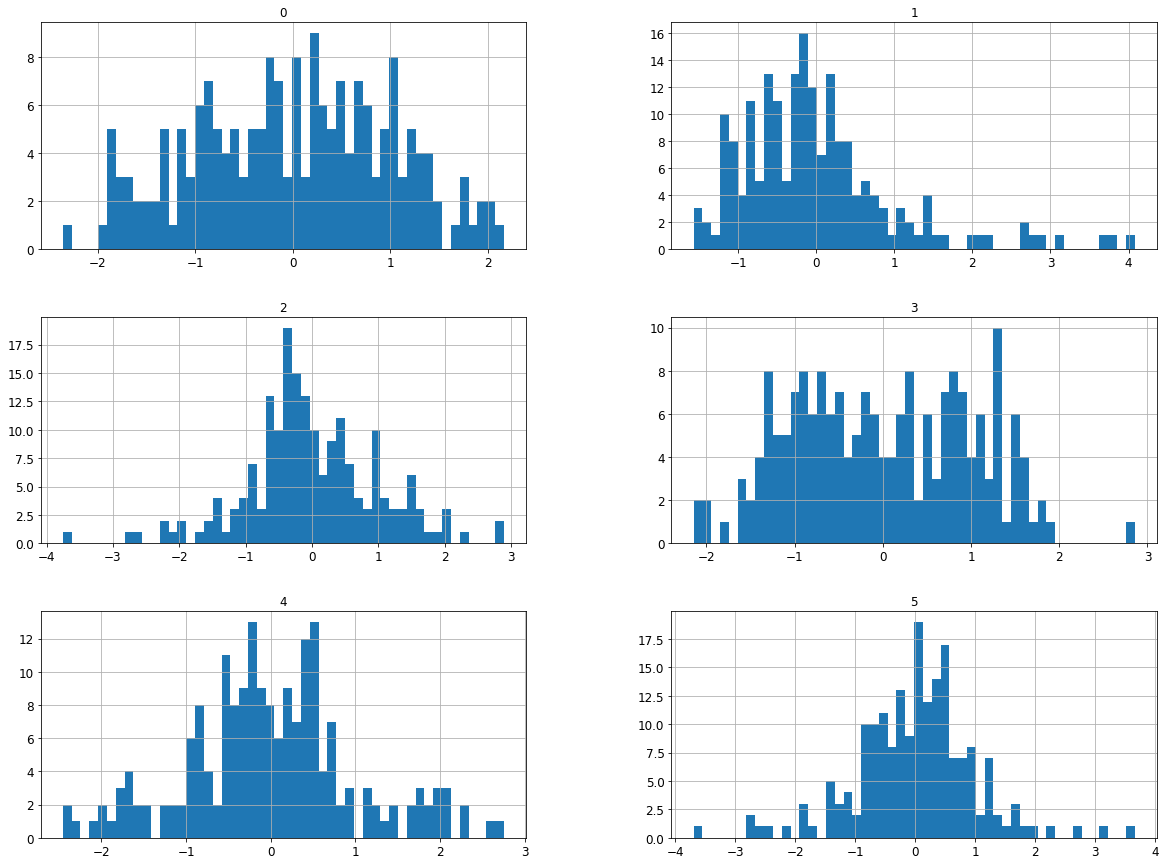

In [30]:
S_ica_.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A64D0D4A8>,
      dtype=object)

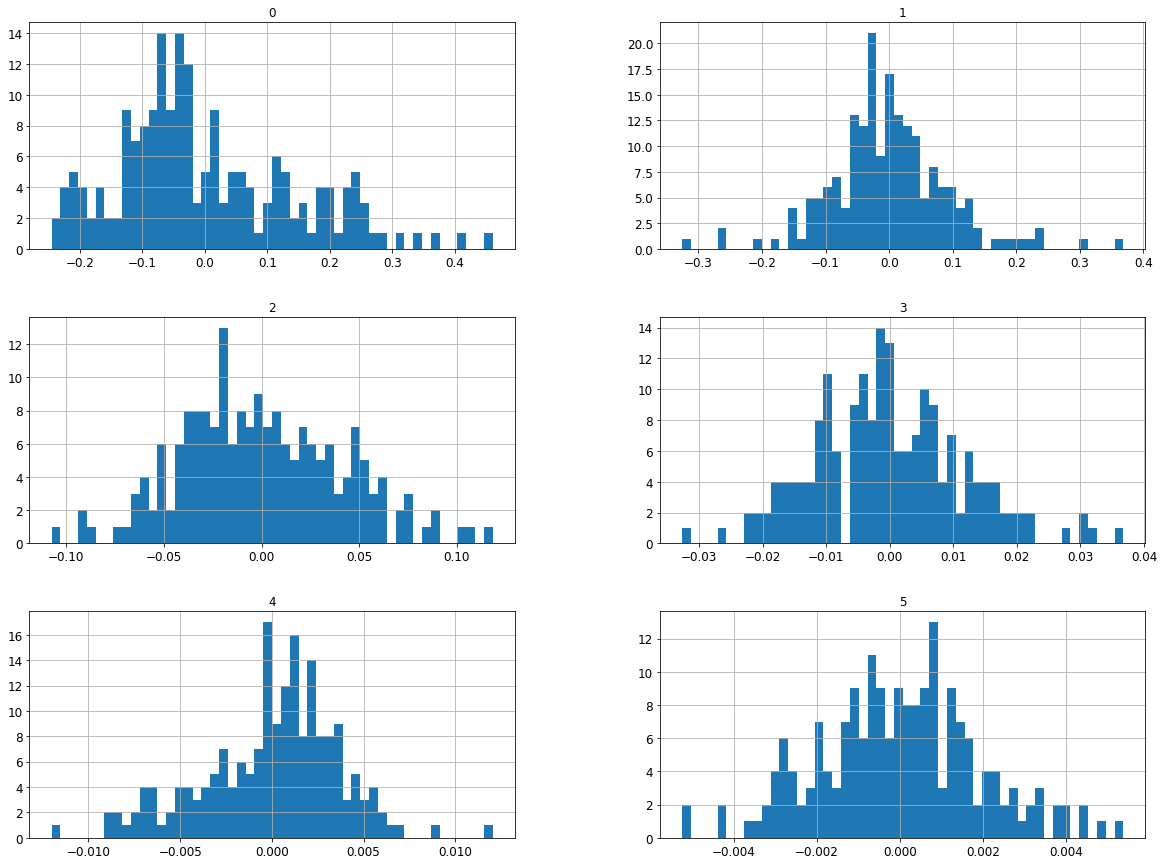

In [31]:
S_pca_ = pd.DataFrame(S_pca_)
S_pca_.hist(bins=50, figsize=(20,15))

In [18]:
# Check that there exist no corelations between the dataset
S_pca_ = pd.DataFrame(S_pca_)
corr_matrix = S_pca_.corr()
corr_matrix

,0,1,2,3,4,5,6,7
0,1.000000e+00,1.008066e-13,8.821474e-16,4.908003e-14,3.004090e-15,5.846117e-14,-4.039789e-15,2.098993e-14
1,1.008066e-13,1.000000e+00,4.118656e-15,2.147130e-15,-2.197531e-15,-3.879673e-15,-1.423048e-15,-1.223000e-14
2,8.821474e-16,4.118656e-15,1.000000e+00,1.513182e-15,-1.174707e-15,-1.127039e-16,-3.602926e-15,3.856278e-15
3,4.908003e-14,2.147130e-15,1.513182e-15,1.000000e+00,2.242931e-15,8.607457e-16,1.570853e-15,-1.225416e-14
4,3.004090e-15,-2.197531e-15,-1.174707e-15,2.242931e-15,1.000000e+00,-2.860699e-15,9.706812e-16,4.708953e-15
5,5.846117e-14,-3.879673e-15,-1.127039e-16,8.607457e-16,-2.860699e-15,1.000000e+00,1.919634e-16,1.359624e-14
6,-4.039789e-15,-1.423048e-15,-3.602926e-15,1.570853e-15,9.706812e-16,1.919634e-16,1.000000e+00,-1.648703e-14
7,2.098993e-14,-1.223000e-14,3.856278e-15,-1.225416e-14,4.708953e-15,1.359624e-14,-1.648703e-14,1.000000e+00


In [24]:
x = np.linspace(0,189)
plt.plot(x, S_pca_[:,1])

TypeError: '(slice(None, None, None), 1)' is an invalid key

## Choose ICA & PCA data and add

In [67]:
#df = pd.read_csv("3MA_data_in+ica+pca.csv")
df = pd.read_csv("3MA_data_in+ica+pca.csv")
df = df.drop(df.index[190:209])
df.info()

FileNotFoundError: [Errno 2] File b'3MA_data_in+ica+pca.csv' does not exist: b'3MA_data_in+ica+pca.csv'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A6DE1B3C8>,
      dtype=object)

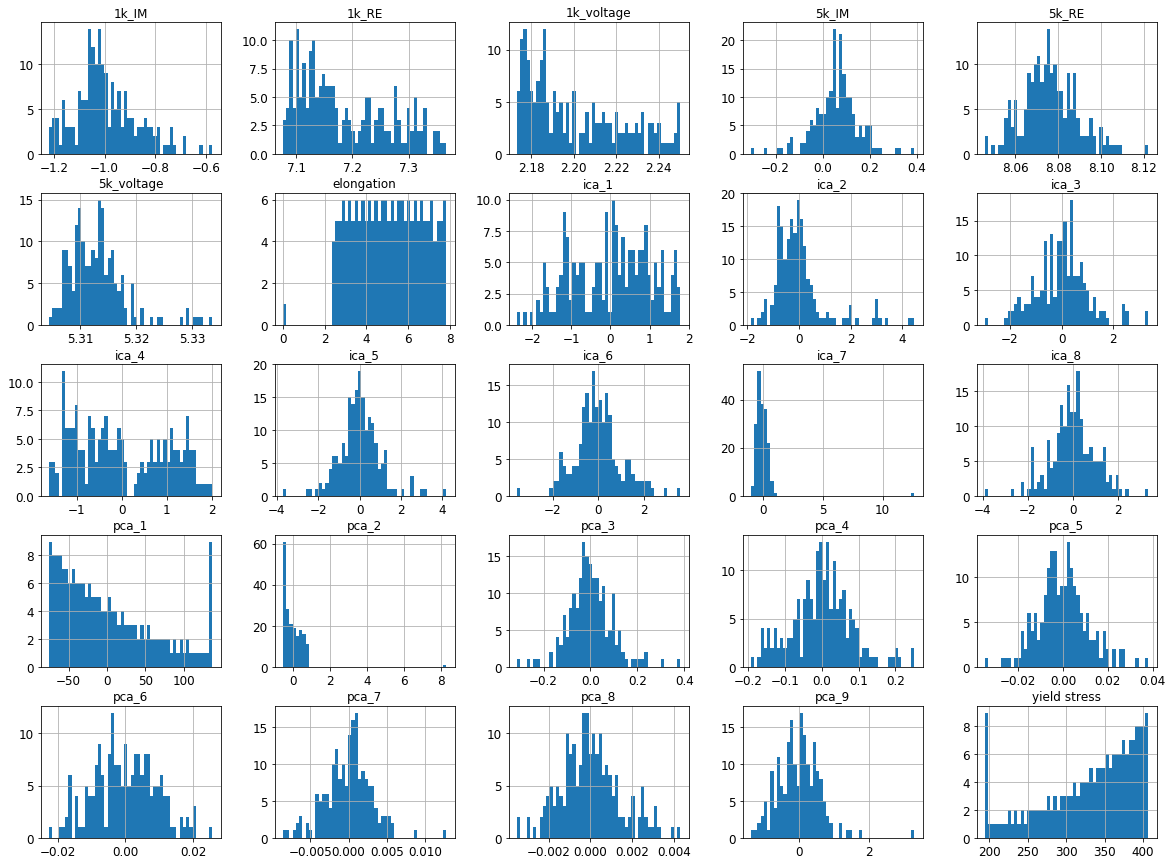

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [52]:
corr_matrix = df.corr()
corr_matrix

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_RE,5k_IM,5k_voltage,ica_1,ica_2,...,ica_8,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
yield stress,1.000000e+00,-8.868064e-01,-0.994657,-0.980480,-0.732689,-0.441823,-0.082548,-0.581111,6.962788e-02,-5.624681e-01,...,4.379274e-02,-1.000000e+00,-2.882989e-04,2.097075e-07,2.935488e-06,-1.844136e-08,-1.974240e-07,-8.942900e-08,5.576266e-07,0.000449
elongation,-8.868064e-01,1.000000e+00,0.897797,0.883247,0.591942,0.290037,0.053422,0.294499,-1.563417e-01,3.905889e-01,...,-6.689147e-02,8.869396e-01,-4.618842e-01,-9.851583e-05,1.075673e-03,4.347234e-05,2.720386e-05,-4.515735e-06,-2.791007e-07,-0.140301
1k_voltage,-9.946571e-01,8.977971e-01,1.000000,0.987401,0.736476,0.421207,0.079463,0.557735,-2.471785e-02,4.993440e-01,...,-2.427201e-02,9.946669e-01,-3.371196e-02,4.244825e-03,1.866880e-02,-2.887958e-02,-6.531561e-02,-1.195567e-02,-6.238348e-02,-0.029553
1k_RE,-9.804797e-01,8.832472e-01,0.987401,1.000000,0.816920,0.405007,0.075760,0.539938,-1.841173e-02,4.853070e-01,...,-1.558157e-02,9.804886e-01,-2.913516e-02,2.895404e-02,1.522287e-01,-4.368224e-02,-1.089125e-01,-1.224855e-03,3.126290e-03,-0.034292
1k_IM,-7.326889e-01,5.919424e-01,0.736476,0.816920,1.000000,0.310078,0.035729,0.477172,-3.945435e-02,4.695515e-01,...,-7.490343e-02,7.326543e-01,1.268026e-01,1.382423e-01,6.541402e-01,5.032178e-03,1.015176e-02,1.364445e-04,-2.378025e-04,0.035020
5k_RE,-4.418234e-01,2.900375e-01,0.421207,0.405007,0.310078,1.000000,0.081091,0.596119,4.519485e-01,4.202562e-01,...,-7.147182e-01,4.417597e-01,2.202936e-01,-4.546835e-02,-5.675711e-02,8.356727e-01,-2.275866e-01,2.971368e-02,-1.701122e-03,0.179308
5k_IM,-8.254805e-02,5.342175e-02,0.079463,0.075760,0.035729,0.081091,1.000000,0.079823,3.155472e-02,1.726674e-01,...,-5.751444e-02,8.253580e-02,4.341542e-02,-9.824743e-01,1.613902e-01,-4.304058e-04,3.782342e-04,3.153543e-06,-7.635947e-06,0.076930
5k_voltage,-5.811107e-01,2.944989e-01,0.557735,0.539938,0.477172,0.596119,0.079823,1.000000,4.957395e-01,8.048876e-01,...,5.338687e-02,5.809729e-01,4.780246e-01,-1.364052e-02,-1.334726e-02,3.017754e-01,8.730485e-03,-5.847513e-01,2.280566e-02,0.415280
ica_1,6.962788e-02,-1.563417e-01,-0.024718,-0.018412,-0.039454,0.451949,0.031555,0.495739,1.000000e+00,7.532584e-12,...,1.588045e-11,-6.968682e-02,2.046580e-01,-3.061030e-02,-7.702900e-03,3.581994e-01,-6.742130e-01,-5.809886e-01,-1.784503e-01,0.214665
ica_2,-5.624681e-01,3.905889e-01,0.499344,0.485307,0.469552,0.420256,0.172667,0.804888,7.532584e-12,1.000000e+00,...,1.372157e-11,5.624006e-01,2.345292e-01,-1.089111e-01,5.581943e-02,2.917827e-01,4.896977e-01,-4.557039e-01,2.848107e-01,0.405039


- -1.0과 -0.7 사이이면, 강한 음적 선형관계
- -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- -0.3과 -0.1 사이이면, 약한 음적 선형관계
- -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- +0.1과 +0.3 사이이면, 약한 양적 선형관계
- +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [53]:
abs_corr_matrix = np.abs(corr_matrix)

Saving figure abs_heatmap_out.png


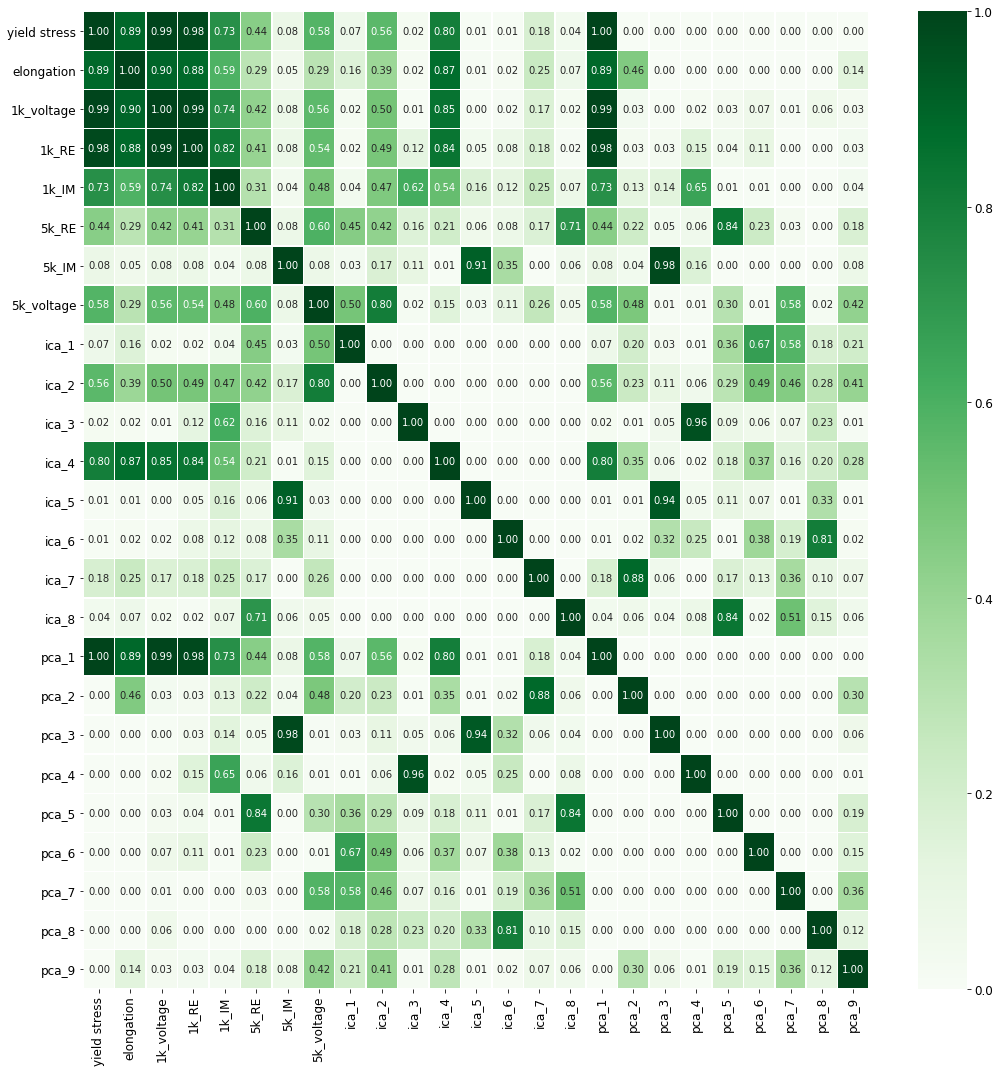

In [54]:
import seaborn as sns  

plt.figure(figsize=(15,15))
sns.heatmap(data = abs_corr_matrix, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Greens')

save_fig("abs_heatmap_out.png")

In [69]:
# Check what affects the most for the yield stress
yield_corr = corr_matrix["yield stress"].sort_values(ascending=False)

for key in yield_corr.keys():
    print(key, ":", yield_corr[key])


yield stress : 1.0
ica_1 : 0.06962788286614387
ica_8 : 0.04379273920916437
ica_3 : 0.02405453050468304
pca_9 : 0.0004491579620978134
pca_4 : 2.9354875462543234e-06
pca_8 : 5.576266175357538e-07
pca_3 : 2.0970752589978376e-07
pca_5 : -1.84413639934652e-08
pca_7 : -8.942899701493162e-08
pca_6 : -1.9742402428936778e-07
pca_2 : -0.0002882989379111304
ica_6 : -0.008504869705678235
ica_5 : -0.008975958531794876
5k_IM : -0.08254804673206297
ica_7 : -0.1837622198721719
5k_RE : -0.441823369925482
ica_2 : -0.5624680807385593
5k_voltage : -0.5811107067374501
1k_IM : -0.7326888502982527
ica_4 : -0.8014759744089266
elongation : -0.8868063653609044
1k_RE : -0.980479669847717
1k_voltage : -0.9946570634639302
pca_1 : -0.9999999584374989


In [70]:
elong_corr = corr_matrix["elongation"].sort_values(ascending=False)
elong_corr

elongation      1.000000e+00
1k_voltage      8.977971e-01
pca_1           8.869396e-01
1k_RE           8.832472e-01
ica_4           8.704528e-01
1k_IM           5.919424e-01
ica_2           3.905889e-01
5k_voltage      2.944989e-01
5k_RE           2.900375e-01
5k_IM           5.342175e-02
ica_6           1.744662e-02
ica_5           1.210702e-02
pca_4           1.075673e-03
pca_5           4.347234e-05
pca_6           2.720386e-05
pca_8          -2.791007e-07
pca_7          -4.515735e-06
pca_3          -9.851583e-05
ica_3          -1.787726e-02
ica_8          -6.689147e-02
pca_9          -1.403011e-01
ica_1          -1.563417e-01
ica_7          -2.450807e-01
pca_2          -4.618842e-01
yield stress   -8.868064e-01
Name: elongation, dtype: float64

# 10 variables
#### feature discarded: pca_3 ~ pca_8, ica_3, ica_5~ ica_8, 5k_IM

In [15]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,193.928416,0.000001,2.247535,7.353994,-0.617027,8.103753,0.048710,5.330770,-0.116510,-0.117151,...,-0.075769,330.186138,35.414014,13.629898,-0.042054,-0.067931,-0.026539,0.174546,0.150698,3.271426
1,193.928416,7.832161,2.249186,7.330924,-0.934697,8.084683,0.057399,5.329357,0.786518,-3.171239,...,-0.557662,327.215644,36.184830,-1.546919,0.264383,-1.961450,-1.454055,-0.901060,-0.069204,0.789393
2,193.928416,7.825444,2.248753,7.367316,-0.574723,8.099559,0.125401,5.331381,0.081439,-4.195743,...,-0.308729,324.177928,37.222513,-2.131075,0.421728,2.517910,-0.056068,0.758381,-0.524406,1.443719
3,193.928416,7.813692,2.249833,7.345533,-0.862965,8.103011,0.153286,5.329095,0.951304,-2.862410,...,0.559499,321.141359,38.188802,-1.392249,-0.649956,-0.864369,0.426757,-1.052226,0.228620,0.481708
4,193.928416,7.780144,2.247326,7.350974,-0.681030,8.122078,0.185302,5.333564,-0.096708,-4.449416,...,0.295758,318.102756,39.253055,-2.435435,-0.370063,1.345922,1.818258,0.718582,-0.071789,1.750102
5,193.928416,7.742729,2.248745,7.344526,-0.815595,8.103104,0.089639,5.330322,0.582137,-3.361927,...,0.105624,315.066068,40.219078,-1.610580,0.193874,-0.476010,0.297255,-0.447094,0.180261,0.767154
6,193.928416,7.705922,2.250206,7.358278,-0.740627,8.084127,0.123405,5.327734,0.822732,-2.979782,...,-0.019516,312.029066,41.205421,-1.160051,-0.105129,0.518173,-1.245936,-0.507140,-0.165914,0.239901
7,193.928416,7.670275,2.246974,7.330445,-0.816994,8.095942,0.197479,5.324049,0.463827,-3.079435,...,-0.314634,308.991935,42.193935,-0.769560,-1.146472,-0.268112,-0.118007,1.899121,0.055036,-0.229482
8,198.004047,7.635231,2.245037,7.329315,-0.785081,8.079228,0.040980,5.322461,0.367969,-3.036743,...,-0.807350,304.671448,39.325672,-0.654320,0.571696,-0.152964,-1.555318,2.011044,0.362532,-0.299714
9,202.065831,7.600230,2.243179,7.328723,-0.825355,8.091719,0.020096,5.324349,0.362994,-3.031485,...,0.529350,300.354822,36.492382,-0.966852,0.783307,-0.590252,-0.436146,0.745603,1.496338,0.134134


In [55]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM", "1k_voltage", "5k_RE", "5k_voltage", "pca_1", "ica_2","ica_4"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2)
len(X_train)

152

In [56]:
len(X_test)

38

In [57]:
X_train.shape

(152, 8)

In [58]:
X_train

,1k_RE,1k_IM,1k_voltage,5k_RE,5k_voltage,pca_1,ica_2,ica_4
6,7.358278,-0.740627,2.250206,8.084127,5.327734,137.290372,2.986177,0.846309
90,7.170437,-1.045207,2.195374,8.058109,5.308463,-11.147900,-0.268769,-0.026316
104,7.129160,-1.201569,2.190503,8.072862,5.306379,-22.860009,-0.804479,-0.102440
80,7.174609,-0.998405,2.200066,8.070097,5.310379,-1.947439,-0.086899,0.051772
178,7.100199,-1.030840,2.175598,8.065609,5.316091,-70.256702,0.423326,-1.543946
150,7.100287,-1.144570,2.178678,8.080033,5.315618,-54.510891,0.468774,-1.307107
162,7.102419,-1.101962,2.177289,8.074755,5.314854,-61.611288,0.211623,-1.286889
109,7.147599,-1.058126,2.187657,8.072554,5.310254,-26.716012,0.280249,-0.721724
16,7.305468,-0.843201,2.237060,8.079857,5.318954,104.085853,1.779339,0.783884
87,7.184526,-0.903944,2.197248,8.055237,5.309044,-8.463328,-0.198092,-0.028969


In [59]:
X_train

,1k_RE,1k_IM,1k_voltage,5k_RE,5k_voltage,pca_1,ica_2,ica_4
6,7.358278,-0.740627,2.250206,8.084127,5.327734,137.290372,2.986177,0.846309
90,7.170437,-1.045207,2.195374,8.058109,5.308463,-11.147900,-0.268769,-0.026316
104,7.129160,-1.201569,2.190503,8.072862,5.306379,-22.860009,-0.804479,-0.102440
80,7.174609,-0.998405,2.200066,8.070097,5.310379,-1.947439,-0.086899,0.051772
178,7.100199,-1.030840,2.175598,8.065609,5.316091,-70.256702,0.423326,-1.543946
150,7.100287,-1.144570,2.178678,8.080033,5.315618,-54.510891,0.468774,-1.307107
162,7.102419,-1.101962,2.177289,8.074755,5.314854,-61.611288,0.211623,-1.286889
109,7.147599,-1.058126,2.187657,8.072554,5.310254,-26.716012,0.280249,-0.721724
16,7.305468,-0.843201,2.237060,8.079857,5.318954,104.085853,1.779339,0.783884
87,7.184526,-0.903944,2.197248,8.055237,5.309044,-8.463328,-0.198092,-0.028969


In [60]:
ys_train

94     345.859194
90     342.349176
177    400.887832
30     263.245720
49     296.871402
107    356.315380
121    366.654355
172    398.277091
55     305.276137
5      193.928416
45     290.786577
28     258.910963
64     316.455684
62     314.154595
43     287.570781
78     331.273142
48     295.387732
150    385.684125
3      193.928416
184    404.428756
76     329.246265
4      193.928416
63     315.336853
46     292.332441
27     256.590764
77     330.233242
72     325.176236
84     336.940957
87     339.666074
26     254.290912
          ...    
125    369.528911
146    383.232467
128    371.504751
86     338.774995
53     302.557600
173    398.820064
1      193.928416
169    396.647800
80     333.152776
185    404.948654
100    350.772467
178    401.415609
130    372.918227
129    372.252522
38     278.967228
11     209.794458
51     299.769569
188    406.350841
112    360.135508
179    401.936867
95     346.678911
159    391.019059
117    363.809351
58     309.210717
151    386

In [61]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)

el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[-2.04421426],
       [-0.79846458],
       [-0.74158655],
       [ 1.22400725],
       [-0.44229709],
       [ 0.7559952 ],
       [-1.86540088],
       [-0.41917952],
       [ 0.81185702],
       [ 1.03080267],
       [ 0.04786108],
       [ 1.09701079],
       [ 0.40018939],
       [ 0.7456588 ],
       [ 0.56801436],
       [ 1.02041715],
       [ 0.18843589],
       [ 0.86641812],
       [ 0.90867181],
       [ 0.38772098],
       [ 0.65210609],
       [-0.15830189],
       [-1.92221054],
       [-1.08096737],
       [ 1.00091213],
       [ 0.09554168],
       [ 0.98061848],
       [-0.48807396],
       [-1.38330395],
       [-0.10385105],
       [ 0.73314546],
       [-2.24107351],
       [ 0.30450631],
       [ 0.88767096],
       [ 0.8008603 ],
       [-0.88674823],
       [-1.51307911],
       [ 0.58033057]])

In [62]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [63]:
X_train_std

array([[ 2.30313758,  2.19610902,  2.26298435, ...,  2.34123565,
         2.9338945 ,  0.90479238],
       [-0.14552667, -0.37915428, -0.21587387, ..., -0.16172752,
        -0.28062532,  0.01897066],
       [-0.68361221, -1.70121482, -0.43611521, ..., -0.35921686,
        -0.80968137, -0.05830452],
       ...,
       [ 1.67170933,  1.22039411,  1.6406209 , ...,  1.62940683,
         0.50470727,  1.54395334],
       [-0.88760524, -0.22536868, -1.07414533, ..., -1.10544308,
         0.08785671, -1.24385279],
       [ 1.23013894,  0.86968471,  1.14294807, ...,  1.00134941,
        -0.47975807,  1.65614969]])

In [64]:
ys_train

array([[345.859194 ],
       [342.3491757],
       [400.8878322],
       [263.2457198],
       [296.871402 ],
       [356.3153804],
       [366.654355 ],
       [398.2770909],
       [305.2761365],
       [193.928416 ],
       [290.7865768],
       [258.9109635],
       [316.4556836],
       [314.1545951],
       [287.5707808],
       [331.2731424],
       [295.3877316],
       [385.6841251],
       [193.928416 ],
       [404.4287558],
       [329.2462646],
       [193.928416 ],
       [315.3368533],
       [292.3324414],
       [256.5907645],
       [330.2332422],
       [325.1762356],
       [336.9409571],
       [339.6660743],
       [254.2909124],
       [380.087891 ],
       [344.9516204],
       [405.4081423],
       [406.8904463],
       [261.0940842],
       [241.7331269],
       [403.9912956],
       [328.2624228],
       [352.3927397],
       [393.3242347],
       [227.1339494],
       [318.7140645],
       [373.60206  ],
       [193.928416 ],
       [402.9501266],
       [36

Select and train a SGD regression model
===

Yield Stress

In [65]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/SGD_Regression/yield_stress_10V_ica&pca"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [66]:
# Normal Stochastic Gradient Descent

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_std, ys_train_std)
ys_predictions_sgd = sgd_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
sgd_mse = mean_squared_error(ys_train, ys_predictions_sgd)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


58.857172465227045

Hyper Parameters Tuning: GridSearch CV function
---

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=False)[source]

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### parameters

- **estimator**[estimator object.]: This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

- **param_grid**[dict or list of dictionaries]: This enables searching over any sequence of parameter settings.
  - Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
  
- **scoring**[string, callable, list/tuple, dict or None, default: None]: A single string or a callable to evaluate the predictions on the test set.
  - NOTE that when using custom scorers, each scorer should return a single value. Metric functions returning a list/array of values can be wrapped into multiple scorers that return one value each.
  - If None, the estimator’s score method is used.

- **n_jobs**[int or None, optional (default=None)]:specify how many concurrent processes/threads should be used for parallelized routines.
  - None means 1 unless in a joblib.parallel_backend context. 
  - -1 means using all processors.
  - Whether parallel processing is helpful at improving runtime depends on many factors, and it’s usually a good idea to experiment rather than assuming that increasing the number of jobs is always a good thing. It can be highly detrimental to performance to run multiple copies of some estimators or functions in parallel.
  
- **pre_dispatch**[int, or string, optional]: Controls the number of jobs that get dispatched during parallel execution
  - Reducing this number can be useful to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process.
    - None, in which case all the jobs are immediately created and spawned. Use this for lightweight and fast-running jobs, to avoid delays due to on-demand spawning of the jobs
    - An int, giving the exact number of total jobs that are spawned
    - A string, giving an expression as a function of n_jobs, as in ‘2*n_jobs’
    
- **iid**[boolean, default=’warn’]: If True, return the average score across folds, weighted by the number of samples in each test set.
  - In this case, the data is assumed to be identically distributed across the folds, and the loss minimized is the total loss per sample, and not the mean loss across the folds. 
  - If False, return the average score across folds. 
  - Changed in version 0.20: Parameter iid will change from True to False by default in version 0.22, and will be removed in 0.24.
  
- **cv**[int, cross-validation generator or an iterable, optional]: Determines the cross-validation splitting strategy.
  - possible inputs of cv are:
    - None, to use the default 3-fold cross validation,
    - integer, to specify the number of folds in a (Stratified)KFold,
    - CV splitter,
    - An iterable yielding (train, test) splits as arrays of indices.
    - For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
    
- **refit**[ boolean, string, or callable, default=True]: Refit an estimator using the best found parameters on the whole dataset.
  - For multiple metric evaluation, this needs to be a string denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.
  - The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance.
  - Also for multiple metric evaluation, the attributes best_index_, best_score_ and best_params_ will only be available if refit is set and all of them will be determined w.r.t this specific scorer. best_score_ is not returned if refit is callable.
  
- **verbose**[int]: Controls the verbosity: the higher, the more messages.

- **error_score**[‘raise’ or numeric]: Value to assign to the score if an error occurs in estimator fitting.
  - If set to ‘raise’, the error is raised. 
  - If a numeric value is given, FitFailedWarning is raised. 
  - Default is ‘raise’ but from version 0.22 it will change to np.nan.
  
- **return_train_score**[boolean, default=False]: If False, the cv_results_ attribute will not include training scores. 
  - Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. 
  - However computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance.


### Attributes

- **cv_results_**[dict of numpy (masked) ndarrays]: A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.

<div>
{
'param_kernel': masked_array(data = ['poly', 'poly', 'rbf', 'rbf'],
                             mask = [False False False False]...)
                             
'param_gamma': masked_array(data = [-- -- 0.1 0.2],
                            mask = [ True  True False False]...),
                            
'param_degree': masked_array(data = [2.0 3.0 -- --],
                             mask = [False False  True  True]...),
                             
'split0_test_score'  : [0.80, 0.70, 0.80, 0.93],

'split1_test_score'  : [0.82, 0.50, 0.70, 0.78],

'mean_test_score'    : [0.81, 0.60, 0.75, 0.85],

'std_test_score'     : [0.01, 0.10, 0.05, 0.08],

'rank_test_score'    : [2, 4, 3, 1],

'split0_train_score' : [0.80, 0.92, 0.70, 0.93],

'split1_train_score' : [0.82, 0.55, 0.70, 0.87],

'mean_train_score'   : [0.81, 0.74, 0.70, 0.90],

'std_train_score'    : [0.01, 0.19, 0.00, 0.03],

'mean_fit_time'      : [0.73, 0.63, 0.43, 0.49],

'std_fit_time'       : [0.01, 0.02, 0.01, 0.01],

'mean_score_time'    : [0.01, 0.06, 0.04, 0.04],

'std_score_time'     : [0.00, 0.00, 0.00, 0.01],

'params'             : [{'kernel': 'poly', 'degree': 2}, ...],

}
</div>

  - For multi-metric evaluation, the scores for all the scorers are available in the cv_results_ dict at the keys ending with that scorer’s name ('_<scorer_name>') instead of '_score' shown above.
  
- **best_estimator**[estimator or dict]: Estimator that was chosen by the search,
  -  i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.
  
- **best_score_**[float]:Mean cross-validated score of the best_estimator

- **best_params_**[dict]: Parameter setting that gave the best results on the hold out data.

- **best_index_**[int]: The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.
  - The dict at search.cv_results_['params'][search.best_index_] gives the parameter setting for the best model, that gives the highest mean score (search.best_score_).
  
- **scorer_**[function or a dict]: Scorer function used on the held out data to choose the best parameters for the model.
  - For multi-metric evaluation, this attribute holds the validated scoring dict which maps the scorer key to the scorer callable.

- **n_splits_**[int]: The number of cross-validation splits (folds/iterations).

- **refit_time_**[float]: Seconds used for refitting the best model on the whole dataset.
  - This is present only if refit is not False.


In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {'penalty': [ 'l2', 'l1', 'elasticnet'], 'alpha': [0.001, 0.01,  0.1],
     'l1_ratio': [0.2,0.4,0.6,0.8], 'learning_rate': ['constant', 'optimal','invscaling','adaptive'],
    'eta0': [0.001, 0.01, 0.1],  'early_stopping':[True]}
  ]

sgd_reg = SGDRegressor()

grid_search = GridSearchCV(sgd_reg, param_grid, cv=2,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, ver...
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1], 'early_stopping': [True],
                          'eta0': [0.001, 0.01, 0.1],
                          'l1_ratio': [0.2, 0.4, 0.6, 0.8],
                          'learning_ra

In [207]:
grid_search.best_estimator_

SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.2,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [208]:
grid_search.best_params_

{'alpha': 0.1,
 'early_stopping': True,
 'eta0': 0.001,
 'l1_ratio': 0.2,
 'learning_rate': 'invscaling',
 'penalty': 'l1'}

In [209]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.0382974053021006 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'constant', 'penalty': 'l2'}
1.070061485048636 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'constant', 'penalty': 'l1'}
1.0367001838085068 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'constant', 'penalty': 'elasticnet'}
6336265276196.594 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'optimal', 'penalty': 'l2'}
9163235885738.81 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'optimal', 'penalty': 'l1'}
8357125359012.666 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'optimal', 'penalty': 'elasticnet'}
1.023941452036638 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'invscaling', 'penalty': 'l2'}
1.0247433227847764 {'alph

In [210]:
ys_sgd_final_model = grid_search.best_estimator_


In [211]:

ys_sgd_train_predictions = ys_sgd_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_sgd_train_mse = mean_squared_error(ys_train, ys_sgd_train_predictions)
ys_sgd_train_rmse = np.sqrt(ys_sgd_train_mse)
ys_sgd_train_rmse

59.420206382358465

In [212]:
ys_train

array([[376.9174364],
       [239.0132519],
       [254.2909124],
       [396.6477999],
       [366.654355 ],
       [318.7140645],
       [314.1545951],
       [378.8268752],
       [302.5575995],
       [311.728646 ],
       [346.6789108],
       [319.843856 ],
       [393.9139928],
       [397.7503173],
       [361.6173138],
       [322.0143481],
       [392.1883937],
       [374.8920937],
       [298.3380418],
       [230.2185847],
       [293.8730246],
       [249.4376223],
       [343.2400466],
       [360.1355076],
       [198.0040467],
       [367.4049917],
       [349.1988703],
       [376.219849 ],
       [303.9293331],
       [380.7116965],
       [316.4556836],
       [374.2402416],
       [331.2731424],
       [387.5319199],
       [287.5707808],
       [246.945844 ],
       [368.7684819],
       [347.4849133],
       [340.591275 ],
       [320.9614608],
       [390.4515104],
       [290.7865768],
       [354.0550831],
       [263.2457198],
       [193.928416 ],
       [24

In [213]:
ys_sgd_train_predictions

array([332.2373685 , 332.63367389, 332.15883666, 332.4550042 ,
       332.51120646, 332.48172153, 332.4346786 , 332.23220812,
       332.5547797 , 332.57574546, 332.68078308, 332.46657721,
       332.53735826, 332.11916962, 332.17432986, 332.07212688,
       332.63783197, 332.14348935, 332.26459546, 332.68403755,
       332.4460932 , 332.61780504, 332.4848841 , 332.67245014,
       332.11051972, 332.56237977, 332.51746056, 332.66111861,
       332.09876971, 332.62849927, 332.28923605, 332.43817723,
       332.21320815, 332.5030641 , 332.4988783 , 332.11024372,
       332.21593392, 332.25033045, 332.18961293, 332.60290715,
       332.6542536 , 332.23200253, 332.46776438, 332.64071348,
       332.13163428, 332.02775173, 332.15177323, 332.48012294,
       332.68284119, 332.12294358, 332.63358311, 332.21159738,
       332.49278811, 332.41048063, 332.57392816, 332.70739604,
       332.13247951, 332.28131712, 332.50839269, 332.18047529,
       332.25468389, 332.60969226, 332.72996625, 332.12

In [214]:
ys_sgd_test_predictions = ys_sgd_final_model.predict(X_test_std)  * np.std(ys_test) + np.mean(ys_test)
ys_sgd_test_mse = mean_squared_error(ys_test,ys_sgd_test_predictions)
ys_sgd_test_rmse = np.sqrt(ys_sgd_test_mse)
ys_sgd_test_rmse

62.167378770348655

## Central Limit Theorem

In [0]:
print(cvres['mean_train_score'].shape)
print('Combinations')

In [0]:
mean_train_score = cvres['mean_train_score']
print(mean_train_score)

In [0]:
mean_test_score = cvres['mean_test_score']
print(mean_test_score)

In [0]:
std_train_score = cvres['std_train_score']
print(std_test_score)

In [0]:
std_test_score = cvres['std_test_score']
print(std_test_score)

In [0]:
#with open('/content/gdrive/My Drive/validation/cvscores/SGD/yield_stress/SGD_2V.txt', 'w') as f:
with open('/BestHyperParameter/SGD_Regression/yield_stress_2V/SGD_2V.txt', 'w') as f: 
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")
    


!cat /content/gdrive/My Drive/validation/cvscores/SGD/yield_stress/SGD_2V.txt


## Train data plotting


Saving figure Train data vs Train Prediction with 2 variables SGD Param Fitted


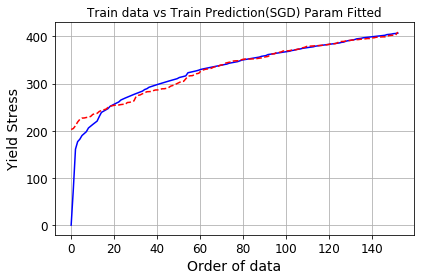

In [0]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_sgd_train_predictions_sort= np.sort(ys_sgd_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_sgd_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(SGD) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_2V_SGD_ParamFitted")

Saving figure Difference between Train data vs Prediction  2 variables SGD Param Fitted


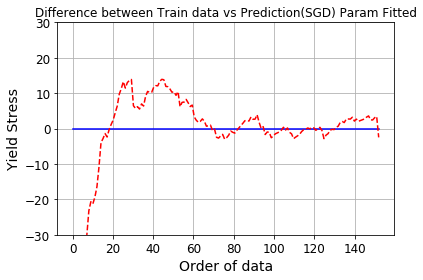

In [0]:
# Difference of train data
difference = ys_train_sort - ys_sgd_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(SGD) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_2V_SGD_ParamFitted")


## Test data plotting

Saving figure Test data vs Test Prediction with 2 variables SGD Param Fitted


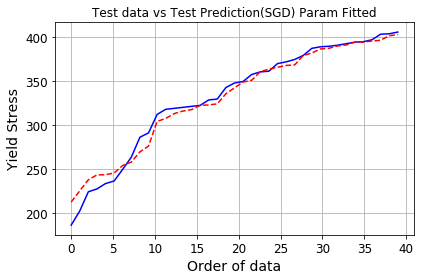

In [0]:
# Difference of test data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_sgd_test_predictions_sort= np.sort(ys_sgd_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_sgd_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(SGD) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_2V_SGD_ParamFitted")

Saving figure Difference between Test data vs Prediction  2 variables SGD Param Fitted


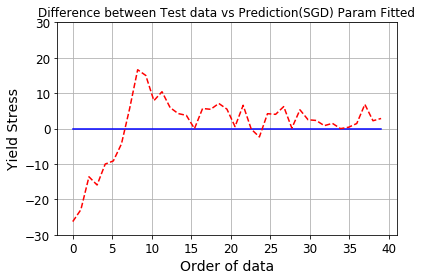

In [0]:
# Difference of test data
difference = ys_test_sort - ys_sgd_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(SGD) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_2V_SGD_ParamFitted")


## Extracting files

In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM fiels to local
files.download('images/BestHyperParameter/SGD_Regression/yield_stress_2V/TrainPrediction_with_2V_SGD_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/SGD_Regression/yield_stress_2V/TestPrediction_with_2V_SGD_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/SGD_Regression/yield_stress_2V/Difference_between_Train_data_vs_Prediction_2V_SGD_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/SGD_Regression/yield_stress_2V/Difference_between_Test_data_vs_Prediction_2V_SGD_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/SGD/SGD_2V.txt')

#### elongation